# Transfer Learning - Transferencia de Aprendizaje

El aprendizaje por transferencia es una técnica de aprendizaje profundo en la que un modelo de red neuronal previamente entrenado (a menudo entrenado en un gran conjunto de datos para una tarea relacionada) se adapta a una tarea nueva y específica. En lugar de entrenar un modelo desde cero, el aprendizaje por transferencia aprovecha el conocimiento adquirido al resolver un problema y lo aplica a un problema diferente pero relacionado.

Conceptos importantes:

1. **Modelo previamente entrenado**: comenzar con un modelo previamente entrenado que ya haya aprendido características útiles de un gran conjunto de datos. Este modelo ha sido entrenado en una tarea como clasificación de imágenes, detección de objetos o procesamiento del lenguaje natural.

2. **Modelo base**: utilizar el modelo previamente entrenado como base o capas iniciales de su nuevo modelo. Estas capas a menudo se denominan "base convolucional" en el caso de tareas relacionadas con imágenes.

3. **Capas adicionales**: agregar capas adicionales encima de la base previamente entrenada. Estas capas suelen ser específicas de la nueva tarea que desea resolver. Por ejemplo, para una nueva tarea de clasificación de imágenes, agregaría algunas capas densamente conectadas.

4. **Entrenamiento**: entrene el modelo combinado en su conjunto de datos específico. Los pesos de las capas previamente entrenadas generalmente se congelan para preservar el conocimiento que ya tienen. Durante el entrenamiento sólo se actualizan los pesos de las capas adicionales.

El aprendizaje por transferencia ofrece varias ventajas:

1. **Entrenamiento más rápido**: dado que comienza con un modelo previamente entrenado, a menudo necesita menos iteraciones de entrenamiento para lograr un buen rendimiento.

2. **Pocos datos de entrenamiento**: puede lograr buenos resultados incluso con un conjunto de datos más pequeño porque el modelo base ya ha aprendido muchas características útiles.

3. **Generalización mejorada**: los modelos previamente entrenados han visto una amplia variedad de datos, lo que les ayuda a aprender características que son más generales y transferibles.


El aprendizaje por transferencia se utiliza ampliamente en diversos problemas, incluida la visión por computadora, el procesamiento del lenguaje natural e incluso algunas tareas especializadas en el procesamiento de audio y el aprendizaje por refuerzo. Es una herramienta poderosa que ha contribuido significativamente al avance del aprendizaje profundo en aplicaciones del mundo real.

## Caso 1:
Utilizar un modelo VGG previamente entrenado como extractor de características y agregue sus propias capas densas personalizadas para la clasificación. Ejemplo  usando TensorFlow y Keras:

```python
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Cargar el modelo pre-entrenado  VGG16  (Excluir la capa de salida)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas
for layer in base_model.layers:
    layer.trainable = False

# Crear un nuevo modelo (clasificador)
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # Asumiendo 10 clases

# Compile el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# imprimir el resumen
model.summary()
```

Explicación:

1. Primero importamos las bibliotecas necesarias y cargamos el modelo VGG16 previamente entrenado sin la capa superior (`include_top=False`).

2. Congelamos las capas previamente entrenadas usando un bucle para evitar que se actualicen durante el entrenamiento.

3. A continuación, creamos un nuevo modelo secuencial y agregamos el modelo VGG previamente entrenado como primera capa. Luego agregamos una capa `Flatten` para convertir los mapas de características 2D en un vector 1D.

4. Agregamos una capa Densa con 256 unidades y activación ReLU, seguida de una capa de `Dropout` para regularización.

5. Finalmente, agregamos una capa Densa de salida con activación softmax, asumiendo 10 clases para la clasificación.

6. El modelo se compila con un optimizador, una función de pérdida y una métrica para evaluación.

Asegúrese de preparar su conjunto de datos para el entrenamiento y la evaluación, y ajuste la forma de entrada y la cantidad de clases de salida según su tarea específica.

In [ ]:

#from google.colab import drive
#drive.mount('/content/gdrive',force_remount=True)
#root_dir = '/content/gdrive/My Drive/Colab Notebooks/'

In [29]:
#load data
import numpy as np
import matplotlib.pyplot       as plt
from mlxtend.data import loadlocal_mnist
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

root_dir = ''

X_train, y_train = loadlocal_mnist(
        images_path=root_dir+'MNIST/train-images-idx3-ubyte', 
        labels_path=root_dir+'MNIST/train-labels-idx1-ubyte')

X_test, y_test = loadlocal_mnist(
        images_path=root_dir+'MNIST/t10k-images-idx3-ubyte', 
        labels_path=root_dir+'MNIST/t10k-labels-idx1-ubyte')

#organizar como arreglo de matrices
X_train = X_train.reshape(60000,28,28)
X_test = X_test.reshape(10000,28,28)

#ajustar para que sea de 3 canales
X_train = np.repeat(X_train[:, :,:, np.newaxis], 3, axis=3)
X_test  = np.repeat(X_test[:, :,:, np.newaxis], 3, axis=3)
#cambiar dimensiones 48x48
new_dim = (48,48)
X_train = np.array([cv2.resize(image, new_dim) for image in X_train])
X_test = np.array([cv2.resize(image, new_dim) for image in X_test])



print("[INFO] datos cargados y redimensionados a la forma: num imagenes x filas x columnas x 3 canales")
labels,count_class = np.unique(y_train,return_counts=True)
print(' \nEtiquetas o clases: \n %s \nDatos por clase \n %s' % (labels,count_class))
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

num_classes = labels.size


[INFO] datos cargados y redimensionados a la forma: num imagenes x filas x columnas x 3 canales
 
Etiquetas o clases: 
 [0 1 2 3 4 5 6 7 8 9] 
Datos por clase 
 [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
Train set: (60000, 48, 48, 3), Test set: (10000, 48, 48, 3)


7


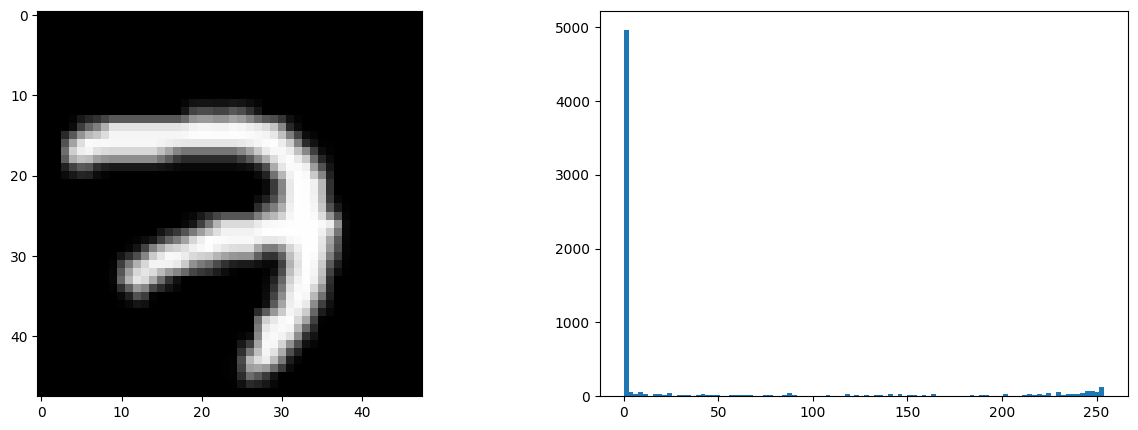

In [30]:
plt.figure(1, figsize=(15, 5))
index = 5000

print(y_train[index])
plt.subplot(121)
plt.imshow(X_train[index],cmap="gray");
plt.subplot(122)
_,_,_=plt.hist(X_train[index].ravel(),100)

In [31]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Cargar el modelo pre-entrenado  VGG16  (Excluir la capa de salida)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Congelar las capas
for layer in base_model.layers:
    layer.trainable = False

# Crear un nuevo modelo (clasificador)
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # Asumiendo 10 clases

# Compile el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# imprimir el resumen
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [32]:
#one hot encoding
train_labels = to_categorical(y_train, num_classes=num_classes)
test_labels = to_categorical(y_test, num_classes=num_classes)
#entrenar el modelo
model.fit(X_train, train_labels, epochs=5, batch_size=100)

Epoch 1/5
600/600 [==============================] - 260s 431ms/step - loss: 0.7819 - accuracy: 0.8264
Epoch 2/5
600/600 [==============================] - 264s 441ms/step - loss: 0.2722 - accuracy: 0.9147
Epoch 3/5
600/600 [==============================] - 265s 441ms/step - loss: 0.2207 - accuracy: 0.9306
Epoch 4/5
600/600 [==============================] - 266s 444ms/step - loss: 0.1980 - accuracy: 0.9364
Epoch 5/5
600/600 [==============================] - 268s 446ms/step - loss: 0.1847 - accuracy: 0.9403


In [33]:
_, accuracy = model.evaluate(X_test, test_labels)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 51s 162ms/step - loss: 0.1328 - accuracy: 0.9584
Accuracy: 95.84


## Caso 2:
utilizar un modelo ResNet previamente entrenado como extractor de características y agregar s capas densas personalizadas para la clasificación. Ejemplo usando TensorFlow y Keras:

```python
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Lcargar modelo ResNet50 
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar capas
for layer in base_model.layers:
    layer.trainable = False

# Crear nuevo modelo (clasificador)
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # Asumiendo 10 clases

# Compile el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Mostrar resumen
model.summary()
```

Explicación:
1. Primero importamos las bibliotecas necesarias y cargamos el modelo ResNet50 previamente entrenado sin la capa superior (`include_top=False`).

2. Congelamos las capas previamente entrenadas usando un bucle para evitar que se actualicen durante el entrenamiento.

.....


Ajuste la forma de entrada y la cantidad de clases de salida según su tarea específica.

In [34]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Lcargar modelo ResNet50 
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Congelar capas
for layer in base_model.layers:
    layer.trainable = False

# Crear nuevo modelo (clasificador)
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # Asumiendo 10 clases

# Compile el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Mostrar resumen
model.summary()

94765736/94765736 [==============================] - 4s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1048704   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 24,637,706
Trainable params: 1,049,994
Non-trainable params: 23,587,712
___________________________________

In [35]:
#entrenar el modelo
model.fit(X_train, train_labels, epochs=5, batch_size=100)
_, accuracy = model.evaluate(X_test, test_labels)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/5
600/600 [==============================] - 187s 304ms/step - loss: 0.4674 - accuracy: 0.8543
Epoch 2/5
600/600 [==============================] - 179s 298ms/step - loss: 0.2443 - accuracy: 0.9233
Epoch 3/5
600/600 [==============================] - 182s 304ms/step - loss: 0.2101 - accuracy: 0.9339
Epoch 4/5
600/600 [==============================] - 182s 304ms/step - loss: 0.1816 - accuracy: 0.9425
Epoch 5/5
313/313 [==============================] - 46s 142ms/step - loss: 0.0824 - accuracy: 0.9757
Accuracy: 97.57


## Caso 3:

Utilizar un modelo MobileNet previamente entrenado como extractor de características y agregar capas densas personalizadas para la clasificación. Ejemplo usando TensorFlow y Keras:

```python
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Cargar MobileNetV2 
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar capas
for layer in base_model.layers:
    layer.trainable = False

# Crear clasificador
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Asumir 10 clases
# Compile el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# mostrar resultado
model.summary()
```

Ajuste la forma de entrada y la cantidad de clases de salida según su tarea específica.

In [40]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Cargar MobileNetV2 
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Congelar capas
for layer in base_model.layers:
    layer.trainable = False

# Crear clasificador
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Asumir 10 clases
# Compile el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# mostrar resultado
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 2, 2, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_8 (Dense)             (None, 128)               163968    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,423,242
Trainable params: 165,258
Non-trainable params: 2,257,984
_________________________________________________________________


In [41]:
#entrenar el modelo
model.fit(X_train, train_labels, epochs=5, batch_size=100)
_, accuracy = model.evaluate(X_test, test_labels)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/5
600/600 [==============================] - 38s 60ms/step - loss: 0.4601 - accuracy: 0.8508
Epoch 2/5
600/600 [==============================] - 36s 60ms/step - loss: 0.2910 - accuracy: 0.9043
Epoch 3/5
600/600 [==============================] - 37s 62ms/step - loss: 0.2464 - accuracy: 0.9182
Epoch 4/5
600/600 [==============================] - 36s 59ms/step - loss: 0.2192 - accuracy: 0.9271
Epoch 5/5
313/313 [==============================] - 8s 24ms/step - loss: 0.2671 - accuracy: 0.9156
Accuracy: 91.56
